# importing pandas and the csv file

In [96]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import scipy.optimize as opt

pokemons= pd.read_csv('pokemon_data.csv')

In [97]:
pokemons

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Generation,Legendary
0,0,Bulbasaur,Grass,Poison,45,49,49,45,1,False
1,1,Ivysaur,Grass,Poison,60,62,63,60,1,False
2,2,Venusaur,Grass,Poison,80,82,83,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,65,1,False
...,...,...,...,...,...,...,...,...,...,...
789,789,Diancie,Rock,Fairy,50,100,150,50,6,True
790,790,DiancieMega Diancie,Rock,Fairy,50,160,110,110,6,True
791,791,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,6,True
792,792,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,6,True


# Quality issues

In [98]:
#Making a copy of the dataframe

pokemons_copy=pokemons

Founding duplicates then deleting it .

In [99]:
#pokemons_copy[pokemons_copy.duplicated()]--->To make sure of duplicates existence

pokemons_copy.drop_duplicates(keep=False,inplace=True)

pokemons_copy

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Generation,Legendary
0,0,Bulbasaur,Grass,Poison,45,49,49,45,1,False
1,1,Ivysaur,Grass,Poison,60,62,63,60,1,False
2,2,Venusaur,Grass,Poison,80,82,83,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,65,1,False
...,...,...,...,...,...,...,...,...,...,...
789,789,Diancie,Rock,Fairy,50,100,150,50,6,True
790,790,DiancieMega Diancie,Rock,Fairy,50,160,110,110,6,True
791,791,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,6,True
792,792,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,6,True


Inconsistent format in row 690 : Name=zweilous**$

In [100]:
pokemons_copy=pokemons_copy.replace('Zweilous**$','Zweilous')

#Test

pokemons_copy.iloc[690]

Unnamed: 0         690
Name          Zweilous
Type 1            Dark
Type 2          Dragon
HP                  72
Attack              85
Defense             70
Speed               58
Generation           5
Legendary        False
Name: 690, dtype: object

in row 535 : Genration =-1 (not allowed)

In [101]:
#first calculating the Generation colums's mean value

pokemons_copy.Generation.mean()

#Generation's mean is approximately 3 

pokemons_copy.Generation=pokemons.Generation.replace(-1,3)

#Testing

pokemons_copy.iloc[535]

Unnamed: 0       535
Name          Dialga
Type 1         Steel
Type 2        Dragon
HP               100
Attack           120
Defense          120
Speed             90
Generation         3
Legendary       True
Name: 535, dtype: object

Inconsistent format in row 671 : Name contains @#

In [102]:
pokemons_copy.Name=pokemons_copy.Name.replace('Cryogonal@#' ,'Cryogonal')

#Test

pokemons_copy.iloc[671]

Unnamed: 0          671
Name          Cryogonal
Type 1              Ice
Type 2              NaN
HP                   70
Attack               50
Defense              30
Speed               105
Generation            5
Legendary         False
Name: 671, dtype: object

Inconsistent format in row 344 : HP is a negative value

In [103]:
pokemons_copy.HP.mean()

#mean is approximately 69

pokemons_copy.loc[344,'HP']=69

pokemons_copy.iloc[344]

Unnamed: 0         344
Name          Sharpedo
Type 1           Water
Type 2            Dark
HP                  69
Attack             120
Defense             40
Speed               95
Generation           3
Legendary        False
Name: 344, dtype: object

Incomplete data in row 720 : Type1=wat

In [104]:
pokemons_copy['Type 1']=pokemons_copy['Type 1'].replace('Wat','Water')

pokemons_copy.iloc[720]

Unnamed: 0          720
Name          Frogadier
Type 1            Water
Type 2              NaN
HP                   54
Attack               63
Defense              52
Speed                97
Generation            6
Legendary         False
Name: 720, dtype: object

Fulling null values in Legendary columns

In [105]:
pokemons_copy.Legendary.fillna('Not defined',inplace = True)

Convert data type of 'Legendary' To category

In [106]:
pokemons_copy.Legendary=pokemons_copy.Legendary.astype('category')

Convert the data type of 'Generation' to category

In [107]:
pokemons_copy.Generation=pokemons_copy.Generation.astype('category')

# Tidiness issues

Lowercase Pokemon names

In [108]:
pokemons_copy.Name=pokemons_copy.Name.str.lower()

pokemons_copy

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Generation,Legendary
0,0,bulbasaur,Grass,Poison,45,49,49,45,1,False
1,1,ivysaur,Grass,Poison,60,62,63,60,1,False
2,2,venusaur,Grass,Poison,80,82,83,80,1,False
3,3,venusaurmega venusaur,Grass,Poison,80,100,123,80,1,False
4,4,charmander,Fire,NaN,39,52,43,65,1,False
...,...,...,...,...,...,...,...,...,...,...
789,789,diancie,Rock,Fairy,50,100,150,50,6,True
790,790,dianciemega diancie,Rock,Fairy,50,160,110,110,6,True
791,791,hoopahoopa confined,Psychic,Ghost,80,110,60,70,6,True
792,792,hoopahoopa unbound,Psychic,Dark,80,160,60,80,6,True


Delete column['Unnamed: 0']

In [109]:
pokemons_copy=pokemons_copy.drop(['Unnamed: 0'],axis=1)

pokemons_copy

,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Generation,Legendary
0,bulbasaur,Grass,Poison,45,49,49,45,1,False
1,ivysaur,Grass,Poison,60,62,63,60,1,False
2,venusaur,Grass,Poison,80,82,83,80,1,False
3,venusaurmega venusaur,Grass,Poison,80,100,123,80,1,False
4,charmander,Fire,NaN,39,52,43,65,1,False
...,...,...,...,...,...,...,...,...,...
789,diancie,Rock,Fairy,50,100,150,50,6,True
790,dianciemega diancie,Rock,Fairy,50,160,110,110,6,True
791,hoopahoopa confined,Psychic,Ghost,80,110,60,70,6,True
792,hoopahoopa unbound,Psychic,Dark,80,160,60,80,6,True


Merge Attack and Defence columns into Total power column

In [110]:
pokemons_copy['Total power']=pokemons_copy['Attack']+pokemons_copy['Defense']
pokemons_copy=pokemons_copy.drop(columns=['Attack','Defense'])

#Test
pokemons_copy

,Name,Type 1,Type 2,HP,Speed,Generation,Legendary,Total power
0,bulbasaur,Grass,Poison,45,45,1,False,98
1,ivysaur,Grass,Poison,60,60,1,False,125
2,venusaur,Grass,Poison,80,80,1,False,165
3,venusaurmega venusaur,Grass,Poison,80,80,1,False,223
4,charmander,Fire,NaN,39,65,1,False,95
...,...,...,...,...,...,...,...,...
789,diancie,Rock,Fairy,50,50,6,True,250
790,dianciemega diancie,Rock,Fairy,50,110,6,True,270
791,hoopahoopa confined,Psychic,Ghost,80,70,6,True,170
792,hoopahoopa unbound,Psychic,Dark,80,80,6,True,220


In [111]:
pokemons_copy['Type 2'].fillna('',inplace=True)
pokemons_copy['Type']=pokemons_copy['Type 1']+' - '+pokemons_copy['Type 2']    
pokemons_copy=pokemons_copy.drop(['Type 1','Type 2'],axis=1)

pokemons_copy

,Name,HP,Speed,Generation,Legendary,Total power,Type
0,bulbasaur,45,45,1,False,98,Grass - Poison
1,ivysaur,60,60,1,False,125,Grass - Poison
2,venusaur,80,80,1,False,165,Grass - Poison
3,venusaurmega venusaur,80,80,1,False,223,Grass - Poison
4,charmander,39,65,1,False,95,Fire -
...,...,...,...,...,...,...,...
789,diancie,50,50,6,True,250,Rock - Fairy
790,dianciemega diancie,50,110,6,True,270,Rock - Fairy
791,hoopahoopa confined,80,70,6,True,170,Psychic - Ghost
792,hoopahoopa unbound,80,80,6,True,220,Psychic - Dark


# Exploring Data with visuals

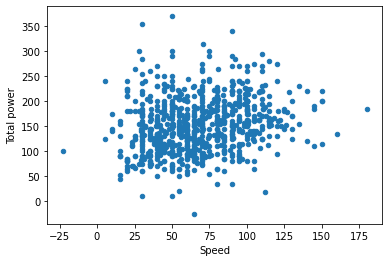

In [112]:
#plot relationship between Speed and Total power

pokemons_copy.plot(x='Speed',y='Total power',kind='scatter')

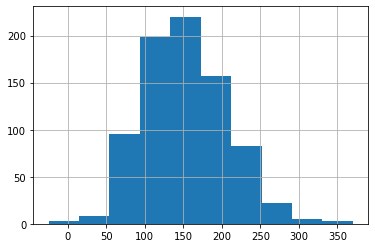

In [113]:
#plot distribution of HP

pokemons_copy['Total power'].hist()

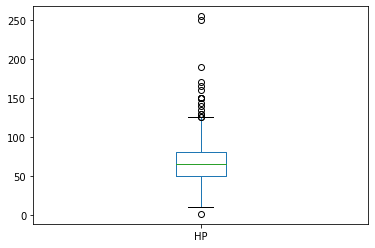

In [114]:
#plot box plots for each Numeric variable

pokemons_copy.HP.plot(kind='box')

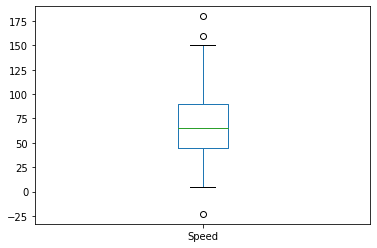

In [115]:
#plot box for Speed

pokemons_copy['Speed'].plot(kind='box')

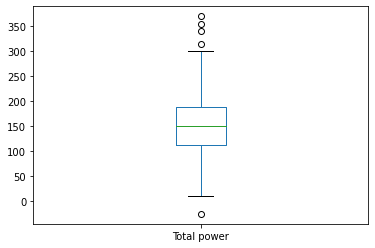

In [116]:
#plot box for Total power

pokemons_copy['Total power'].plot(kind='box')

In [117]:
pokemons_copy.to_csv('Updated_DS.csv')

#  Classification

In [118]:
#Classifying data depending on The scale of Total power

Negative=pokemons_copy[pokemons_copy['Total power']<=150]
Positive=pokemons_copy[pokemons_copy['Total power']>150]

Text(0, 0.5, 'Speed')

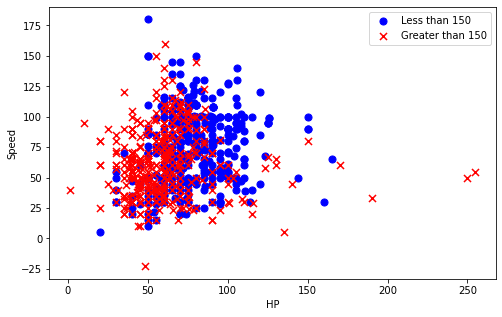

In [119]:
#Plotting classes

fig,ax=plt.subplots(figsize=(8,5))
ax.scatter(Positive.HP,Positive.Speed,s=50,c='b',marker='o',label='Less than 150')
ax.scatter(Negative.HP,Negative.Speed,s=50,c='r',marker='x',label='Greater than 150')
ax.legend()
ax.set_xlabel('HP')
ax.set_ylabel('Speed')

Defining Cost function

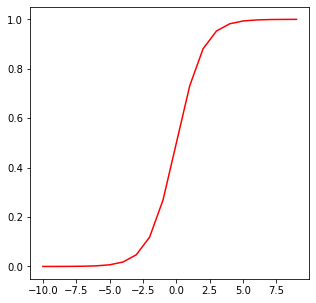

In [120]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')


In [151]:
def Cost(Theta,X,Y):
    Theta=np.matrix(Theta)
    X=np.matrix(X)
    Y=np.matrix(Y)
    A=np.multiply(-Y,np.log(sigmoid(X * Theta.T)))
    B=np.multiply((1-Y),(np.log(1-sigmoid(X*Theta.T))))
    return np.sum(A - B)/(len(X))
                       
pokemons_copy.insert(0,'Ones',1)

#Set x ( Training data) and y (Target variable)

x=pokemons_copy[['Ones','HP','Speed']]
y=pokemons_copy[['Total power']]

#Convert to numpy array and initialize theta array

x=np.array(x.values)
y=np.array(y.values)
theta=np.zeros(3)
                       
cost= Cost(theta,x,y)

cost

0.6931471805599446

In [152]:
def gradient (Theta,X,Y):
    Theta=np.matrix(Theta)
    X=np.matrix(X)
    Y=np.matrix(Y)
    parameters=int(Theta.ravel().shape[1])
    grad=np.zeros(parameters)
    error=sigmoid(X*Theta.T)-Y
    for i in range(parameters):
        term=np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    return grad

result=opt.fmin_tnc(func=Cost,x0=theta,fprime=gradient,args=(x,y))
result

<ipython-input-151-c136e03a4d0e>:6: RuntimeWarning: divide by zero encountered in log
  B=np.multiply((1-Y),(np.log(1-sigmoid(X*Theta.T))))


(array([0., 0., 0.]), 67, 4)

In [153]:
#Cost after optimize

cao=Cost(result[0],x,y)
caoص

0.6931471805599446

In [154]:
def predict(Theta, X):
    probability = sigmoid(X * Theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, x)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
accuracy

0